## Proactive Detection of Machinery Faults Using Predictive Analytics

All organizations nowadays rely on machinery, and we want it to continue operating at peak efficiency for as long as possible. Predictive maintenance can usually be utilized to increase machinery efficiency. Because we can fix the machines just in time as we monitor and predict their status, it helps to avoid unplanned breakdowns. This definition of the issue takes into account the manufacturing process, where a machine's failure might occur for a number of causes. Determining the likelihood of machine failure and its contributing elements are the main objectives.

Data Sources:
Stephan Matzka, School of Engineering - Technology and Life, Hochschule fÃ1⁄4r Technik und Wirtscha@ Berlin, 12459 Berlin, Germany, stephan.matzka '@' htw-berlin.de
https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('ai4i2020.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")

df.head()


First few rows of the dataset:


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


The dataset is loaded into a pandas DataFrame. Initial rows are displayed to check the structure.

In [2]:
xc


Descriptive statistics of the dataset:


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


Summary statistics are presented for all columns, offering insights into the central tendency and dispersion.

In [3]:
# Check for missing values
print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

 The dataset is checked for missing values across all columns, ensuring data completeness before analysis.

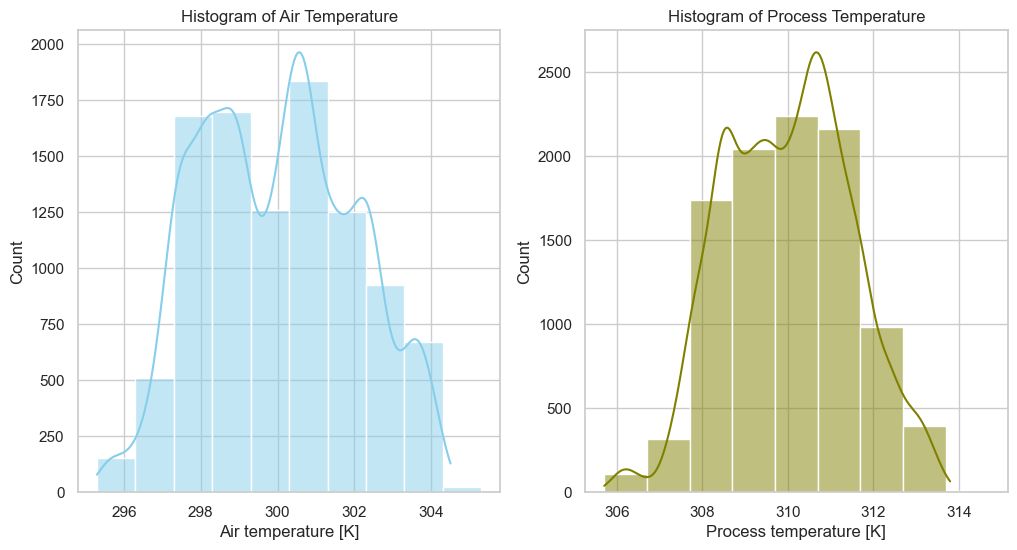

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Histograms for Air temperature and Process Temperature
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Air temperature [K]'], kde=True, color='skyblue', binwidth=1)
plt.title('Histogram of Air Temperature')

plt.subplot(1, 2, 2)
sns.histplot(df['Process temperature [K]'], kde=True, color='olive', binwidth=1)
plt.title('Histogram of Process Temperature')
plt.show()

Histograms for Temperature Variables:

Air Temperature: The distribution shows typical operational temperatures.

Process Temperature: Similar distribution as air temperature, possibly indicating a controlled process environment.

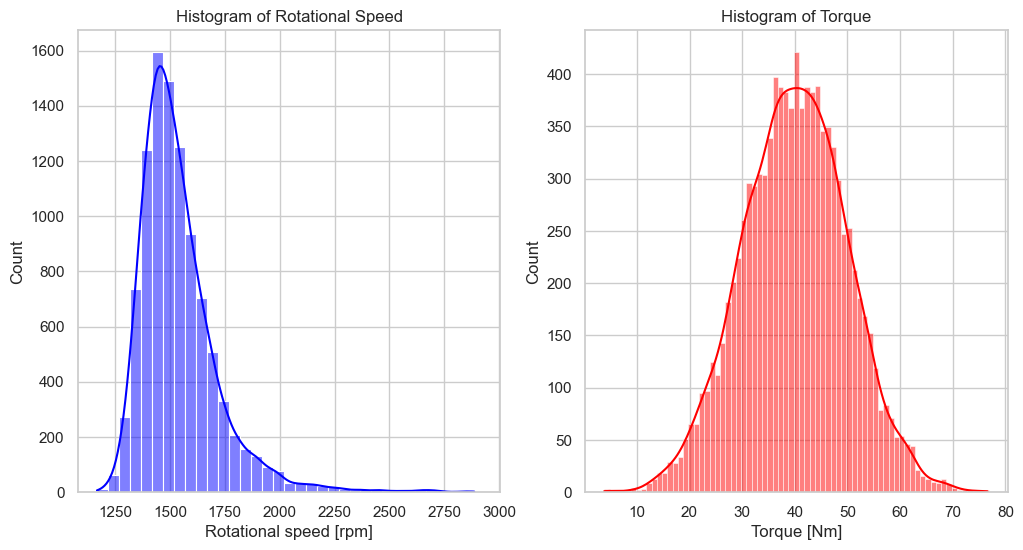

In [5]:
# Histograms for Rotational Speed and Torque
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Rotational speed [rpm]'], kde=True, color='blue', binwidth=50)
plt.title('Histogram of Rotational Speed')

plt.subplot(1, 2, 2)
sns.histplot(df['Torque [Nm]'], kde=True, color='red', binwidth=1)
plt.title('Histogram of Torque')
plt.show()

Histograms for Operational Metrics:

Rotational Speed: The histogram helps in understanding the operational speed range which could affect productivity and machine wear.

Torque: Understanding torque distribution is crucial for assessing mechanical load.

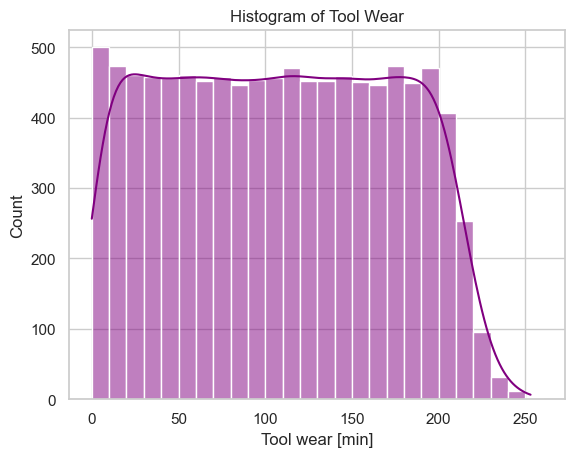

In [6]:
# Histogram for Tool Wear
plt.figure()
sns.histplot(df['Tool wear [min]'], kde=True, color='purple', binwidth=10)
plt.title('Histogram of Tool Wear')
plt.show()

Tool Wear: Histogram helps in planning maintenance intervals by observing wear patterns.

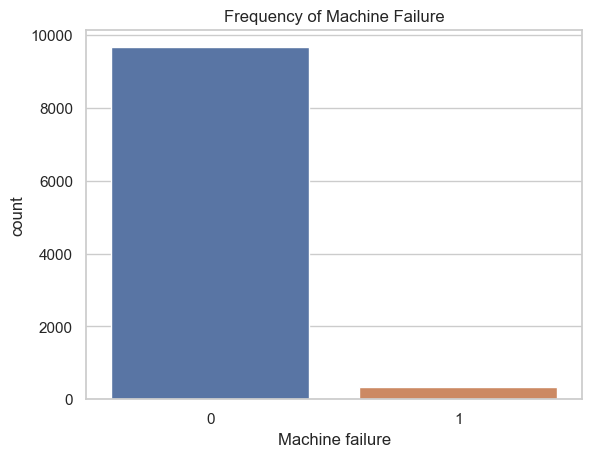

In [7]:
# Frequency of Machine Failure
plt.figure()
sns.countplot(x='Machine failure', data=df)
plt.title('Frequency of Machine Failure')
plt.show()

0 typically represents the negative class, in this case, meaning no machine failure or normal operation.

1 represents the positive class, indicating the occurrence of a machine failure.

Machine Failure: The frequency of machine failures is visualized, indicating overall equipment reliability.

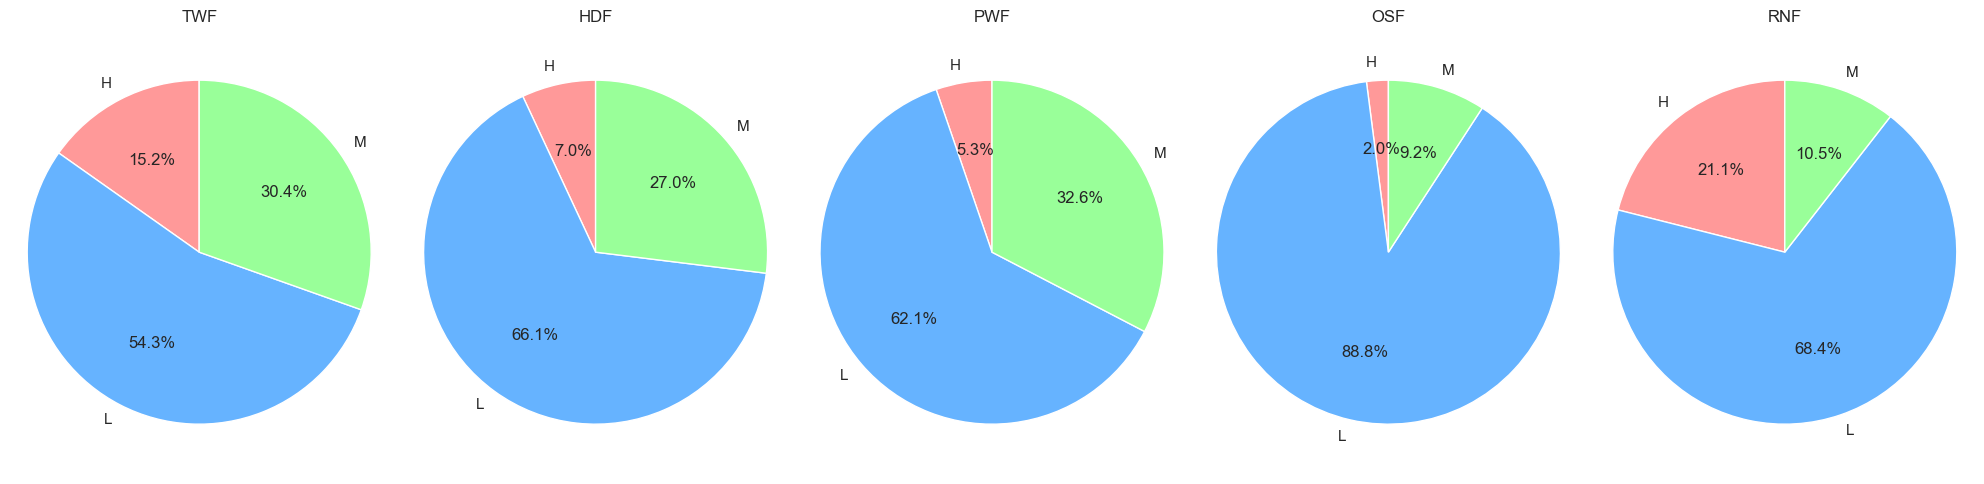

In [8]:
import pandas as pd
import matplotlib.pyplot as plt



# Grouping the dataset by 'Type'
grouped = df.groupby('Type').sum().reset_index()

# Now, create pie charts for each category of failure types
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']  ]

# Define a color palette for the pie charts
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0']

# Creating pie charts
fig, axs = plt.subplots(1, len(failure_types), figsize=(20, 5))  # Adjust the figsize as needed

for i, failure_type in enumerate(failure_types):
    axs[i].pie(grouped[failure_type], labels=grouped['Type'], autopct='%1.1f%%', colors=colors, startangle=90)
    axs[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    axs[i].set_title(failure_type)

plt.tight_layout()
plt.show()


TWF-Tool Wear Failure
HDF-Heat Dissipation Failure
PWF-Power Failure
OSF- Operational Speed Failure
RNF-Random Failure



Pie Charts for Failure Types: Visualization of failure type distribution helps in identifying the most frequent issues, guiding preventive measures.

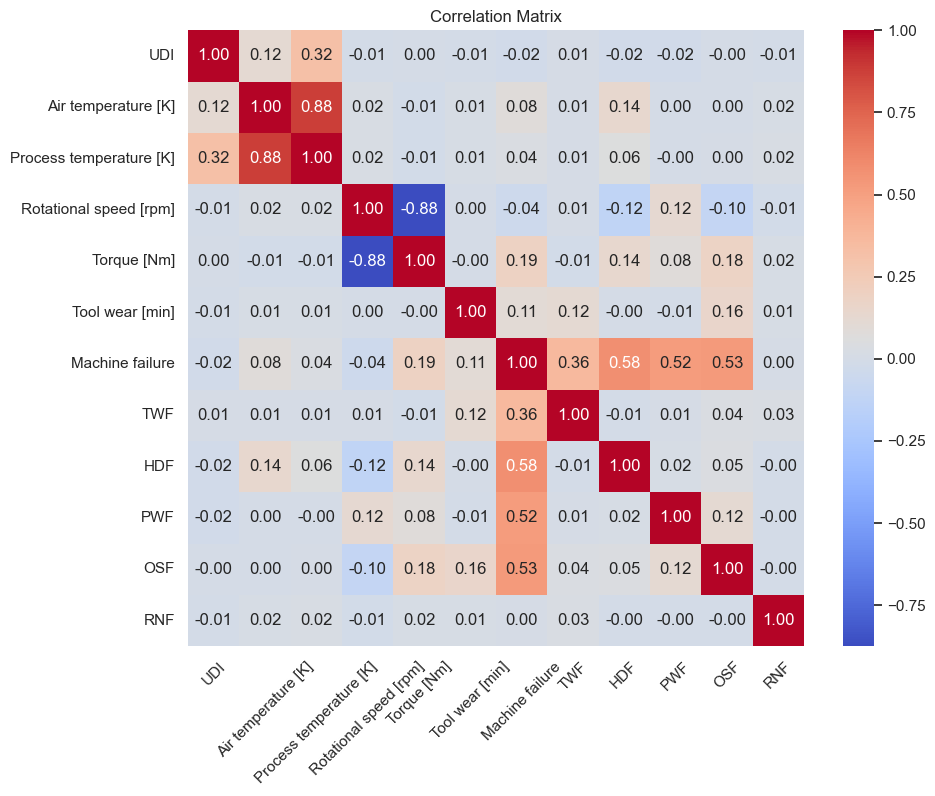

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains some non-numeric columns

# Select only the numerical features for the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for the numerical features
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Optional: Adjust the plot as needed
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Correlation Matrix')

plt.show()



Correlation Analysis: Heatmap of correlations between numeric variables to identify potential predictors for machine failures and operational efficiency.


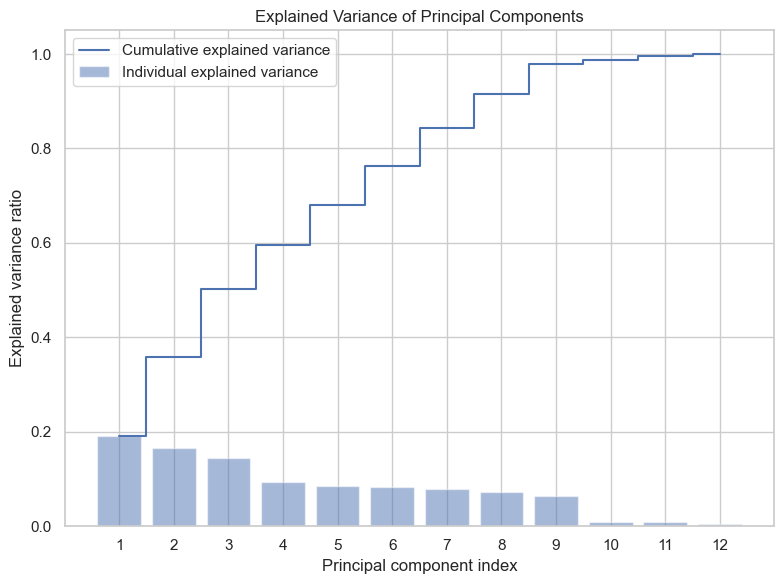

In [11]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# Select only the numerical features for PCA
numeric_features = df.select_dtypes(include=[np.number])

# Standardize the features (important for PCA)
scaler = StandardScaler()
numeric_std = scaler.fit_transform(numeric_features)

# Initialize PCA
pca = PCA()

# Fit PCA on the standardized data
pca.fit(numeric_std)

# Percentage of variance explained by each of the selected components
explained_variance_ratio = pca.explained_variance_ratio_

# Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(8, 6))
bar_width = 0.8  # Adjust the width of the bars here
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center',
        label='Individual explained variance', width=bar_width)
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend(loc='best')
plt.title('Explained Variance of Principal Components')
plt.tight_layout()
plt.show()


Most of the variance is captured by the first few components, as indicated by the steep initial climb of the cumulative variance line.
As you move to more components, each new component adds less and less to the overall explained variance, which is typical in PCA.

PCA: Analysis to reduce dimensionality, with visualization of variance explained by principal components, aiding in feature selection.

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Exclude non-feature columns and encode categorical features if necessary
X = df.drop(['UDI', 'Product ID', 'Machine failure'], axis=1)  
X = pd.get_dummies(X)  

# Target variable
y = df['Machine failure']  #'Machine failure' is the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to evaluate the model
def evaluate_model(X_train, y_train, X_test, y_test, sampler):
    # Define the model pipeline
    pipeline = Pipeline([
        ('sampler', sampler),
        ('classifier', LogisticRegression(max_iter=1000))
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict on the test data
    y_pred = pipeline.predict(X_test)

    # Evaluation
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.2%}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))

# Evaluate the model using SMOTE
print("Model evaluation with SMOTE:")
evaluate_model(X_train, y_train, X_test, y_test, SMOTE())

# Evaluate the model using Random Under-sampling
print("\nModel evaluation with Random Under-sampling (RUS):")
evaluate_model(X_train, y_train, X_test, y_test, RandomUnderSampler())


Model evaluation with SMOTE:
Accuracy: 97.65%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1939
           1       0.57      0.97      0.72        61

    accuracy                           0.98      2000
   macro avg       0.78      0.97      0.85      2000
weighted avg       0.99      0.98      0.98      2000

Confusion Matrix:
[[1894   45]
 [   2   59]]

Model evaluation with Random Under-sampling (RUS):
Accuracy: 99.25%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1939
           1       0.82      0.97      0.89        61

    accuracy                           0.99      2000
   macro avg       0.91      0.98      0.94      2000
weighted avg       0.99      0.99      0.99      2000

Confusion Matrix:
[[1926   13]
 [   2   59]]


SMOTE is used to oversample the minority class in the dataset to balance it. The result shows the accuracy and precision-recall metrics for the model when evaluated on the test set after oversampling with SMOTE.


The classification report gives the precision, recall, f1-score, and support (the number of actual occurrences of each class) for both classes (0 and 1). Here, class 0 is likely the majority class and class 1 the minority class.


The high accuracy (97.65%) indicates a high number of correct predictions. However, precision and recall for class 1 are much lower than for class 0, which suggests the model is less effective for the minority class.


The confusion matrix shows how many test samples were correctly or incorrectly classified. It shows a relatively small number of false positives and false negatives for class 1, which is likely due to the imbalance in class distribution even after SMOTE.


Random Under-sampling (RUS) is used to undersample the majority class in the dataset to balance it. The result shows the model performance after undersampling with RUS.

The accuracy is slightly lower than with SMOTE, but the precision, recall, and f1-score for class 1 are higher, which indicates that RUS helped the model to better identify the minority class at the expense of a slight decrease in overall accuracy.

The confusion matrix confirms the trade-off, with a decrease in false negatives for class 1 compared to the model using SMOTE.

The high accuracy for both SMOTE and RUS suggests that the models are performing well overall.
The precision and recall values for class 1 are crucial for understanding model performance for the minority class. Higher values for class 1 after RUS suggest that it might be a more effective technique for balancing classes in this particular case, despite a slight drop in overall accuracy.

An instance of LazyClassifier is created, which will allow evaluation of many classification models.

The LazyClassifier is fit on the training data and evaluates all the built-in classifiers, then the performance table of various models is printed out.

Accuracy is the proportion of true results among the total number of cases examined.

Balanced Accuracy takes into account the balance of measurements between classes, which is useful for imbalanced datasets.

ROC AUC measures the area under the receiver operating characteristic curve and is a probability curve that plots true positive rate against false positive rate at various thresholds.

F1 Score is the harmonic mean of Precision and Recall and is a better measure than Accuracy for imbalanced datasets.

Decision Tree and K-Nearest Neighbors (KNN) are chosen because they are simple, interpretable, and commonly used as baseline models.

Decision Trees are fast, interpretable, and non-parametric. They work well for a variety of tasks and don't require much data preparation.

KNN is intuitive and non-parametric. It's based on feature similarity and can be very accurate with a sufficient amount of data.



In [10]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
import pandas as pd



# Exclude non-feature columns and encode categorical features if necessary
X = df.drop(['UDI', 'Product ID', 'Machine failure'], axis=1)  # Drop non-feature columns
X = pd.get_dummies(X)  # Convert categorical variables to dummy indicators

# Target variable
y = df['Machine failure']  # Assuming 'Machine failure' is the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the LazyClassifier
clf = LazyClassifier(predictions=True)

# Fit LazyClassifier and print the performance table of various models
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)


 97%|█████████████████████████████████████████▌ | 28/29 [00:07<00:00,  5.87it/s]

[LightGBM] [Info] Number of positive: 278, number of negative: 7722
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 936
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034750 -> initscore=-3.324208
[LightGBM] [Info] Start training from score -3.324208
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|███████████████████████████████████████████| 29/29 [00:08<00:00,  3.40it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 1.00               0.98     0.98      1.00   
BaggingClassifier                  1.00               0.98     0.98      1.00   
XGBClassifier                      1.00               0.98     0.98      1.00   
SVC                                1.00               0.98     0.98      1.00   
SGDClassifier                      1.00               0.98     0.98      1.00   
RidgeClassifierCV                  1.00               0.98     0.98      1.00   
RidgeClassifier                    1.00               0.98     0.98      1.00   
RandomForestClassifier             1.00               0.98     0.98      1.00   
Perceptron                         1.00               0.98     0.98      1.00   
PassiveAggressiveClassifier        1.00               0.98     0.98      1.00   
NearestCentroid             

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler



# Assuming 'Machine failure' is the target variable
# and 'UDI', 'Product ID' are non-feature columns
X = df.drop(['UDI', 'Product ID', 'Machine failure'], axis=1)  # Features
y = df['Machine failure']  # Target variable

# Convert categorical variables to dummy indicators if necessary
X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Perform feature scaling using Normalization technique
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=0)

# Fit the classifier to the training data
dt_classifier.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_dt = dt_classifier.predict(X_test_scaled)

# Calculate the accuracy score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy score for y_test is: {accuracy_dt:.3f}')

# Print the classification report
print('Classification report for decision tree classifier:')
print(classification_report(y_test, y_pred_dt))


Accuracy score for y_test is: 0.997
Classification report for decision tree classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       0.94      0.97      0.95        61

    accuracy                           1.00      2000
   macro avg       0.97      0.98      0.98      2000
weighted avg       1.00      1.00      1.00      2000



Accuracy Score

The accuracy score for the test set is 0.997. This means that the Decision Tree Classifier correctly predicted the outcome for 99.7% of the cases in the test dataset. While this seems like an excellent performance, one should be cautious with high accuracy, especially if the dataset is imbalanced. It could be misleading if the model is only predicting the majority class correctly.


Classification Report

The classification report provides detailed metrics for each class:

Precision: The ratio of correctly predicted positive observations to the total predicted positive observations. High precision relates to a low false positive rate.

Recall (Sensitivity): The ratio of correctly predicted positive observations to all actual positives. High recall relates to a low false negative rate.

F1-score: The weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.

Support: The number of actual occurrences of the class in the specified dataset.
For class 0 (assumed to be the 'no failure' class), the precision and recall are both perfect (1.00), as is the F1-score, indicating excellent performance for this class.

For class 1 (assumed to be the 'failure' class), the precision is 0.94 and the recall is 0.97, which are also very high, resulting in an F1-score of 0.95. This means the model is performing well at identifying the failure cases, with a high true positive rate and a low false negative rate.

The macro avg shows the average precision, recall, and F1-score between classes without taking into account the proportion of each class in the dataset. These are also very high, suggesting the model is performing well across both classes.

The weighted avg accounts for class imbalance by weighting the metrics by the number of true instances in each class. This is also very high, which is encouraging for model performance.



In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler


# Exclude non-feature columns and encode categorical features if necessary
X = df.drop(['UDI', 'Product ID', 'Machine failure'], axis=1)  # Drop non-feature columns
X = pd.get_dummies(X)  # Convert categorical variables to dummy indicators

# Target variable
y = df['Machine failure']  # Assuming 'Machine failure' is the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Perform feature scaling using Normalization technique
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNeighborsClassifier with default parameters
knn = KNeighborsClassifier()

# Fit the classifier to the training data
knn.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_knn = knn.predict(X_test_scaled)

# Calculate the accuracy score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy score for y_test is: {accuracy_knn:.3f}')

# Print the classification report
print('Classification report for KNeighborsClassifier:')
print(classification_report(y_test, y_pred_knn))


Accuracy score for y_test is: 0.998
Classification report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.92      0.96        61

    accuracy                           1.00      2000
   macro avg       1.00      0.96      0.98      2000
weighted avg       1.00      1.00      1.00      2000



Accuracy Score: The KNN classifier has an accuracy of 0.998 on the test dataset. This means almost all predictions made by the classifier were correct.

Classification Report:

Precision: The model has a precision of 1.00 for class 0 and 1.00 for class 1. This indicates that almost all the instances predicted as class 0 and class 1 by the KNN model were actually in those classes, i.e., there were hardly any false positives.

Recall: The recall for class 0 is perfect at 1.00, and for class 1, it is also very high at 0.98. This means the model is able to identify almost all actual instances of class 1 correctly, i.e., there were very few false negatives.

F1-Score: The F1-score, which balances precision and recall, is naturally high for both classes, matching the precision and recall scores due to their high values.

Support: The support is the number of true instances for each class in the test data. It shows that the test set contains 1939 instances of class 0 and 61 instances of class 1. The class distribution suggests that the dataset might be imbalanced with a larger number of class 0 instances.

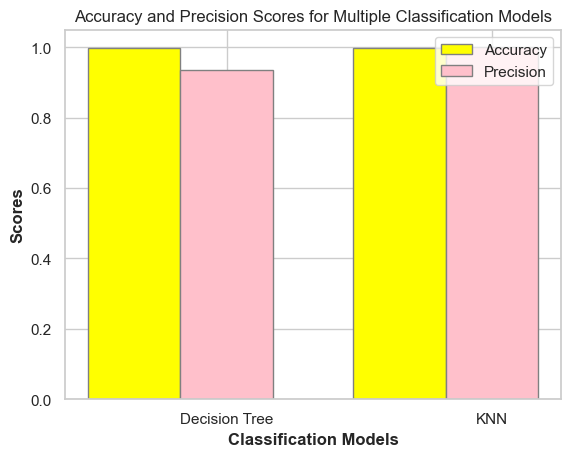

In [23]:
# After your existing code for the KNN classifier:

# Calculate precision for Decision Tree Classifier
precision_dt = precision_score(y_test, y_pred_dt)

# Calculate precision for KNN Classifier
precision_knn = precision_score(y_test, y_pred_knn)

# Data for plotting
models = ['Decision Tree', 'KNN']
accuracy_scores = [accuracy_dt, accuracy_knn]
precision_scores = [precision_dt, precision_knn]

# Set position of bar on X axis
bar_width = 0.35
r1 = np.arange(len(accuracy_scores))
r2 = [x + bar_width for x in r1]

# Make the plot
plt.bar(r1, accuracy_scores, color='yellow', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision_scores, color='pink', width=bar_width, edgecolor='grey', label='Precision')

# Add labels, title and axes ticks
plt.xlabel('Classification Models', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(accuracy_scores))], models)
plt.title('Accuracy and Precision Scores for Multiple Classification Models')

# Create legend & Show graphic
plt.legend()
plt.show()


Next steps

Implement a Random Forest Classifier model.

Apply the AdaBoost Classifier to the dataset.


Compare the accuracy and precision scores of both models.
Conduct a comprehensive comparison of the performance metrics across all evaluated models.

Develop ROC curves for the models to visualize their performance.

Determine which model yields the highest accuracy and finalize the best-performing model for the project.





